In [1982]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1983]:
# load files
edu = pd.read_csv('./education.csv', encoding="ISO-8859-1")
income = pd.read_csv('./income.csv', encoding="ISO-8859-1")
train = pd.read_csv('./police_killings_train.csv', encoding="ISO-8859-1")
test = pd.read_csv('./police_killings_test.csv', encoding="ISO-8859-1")
poverty = pd.read_csv('./poverty.csv', encoding="ISO-8859-1")
race = pd.read_csv('./share_race_by_city.csv', encoding="ISO-8859-1")


In [1984]:
edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [1985]:
income.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [1986]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2028 non-null   int64  
 1   name                     2028 non-null   object 
 2   date                     2028 non-null   object 
 3   manner_of_death          2028 non-null   object 
 4   armed                    2022 non-null   object 
 5   age                      1991 non-null   float64
 6   gender                   2028 non-null   object 
 7   race                     1937 non-null   object 
 8   city                     2028 non-null   object 
 9   state                    2028 non-null   object 
 10  signs_of_mental_illness  2028 non-null   bool   
 11  threat_level             2028 non-null   object 
 12  flee                     2001 non-null   object 
 13  body_camera              2028 non-null   bool   
dtypes: bool(2), float64(1), 

In [1987]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       507 non-null    int64  
 1   name                     507 non-null    object 
 2   date                     507 non-null    object 
 3   manner_of_death          507 non-null    object 
 4   armed                    504 non-null    object 
 5   age                      467 non-null    float64
 6   gender                   507 non-null    object 
 7   race                     403 non-null    object 
 8   city                     507 non-null    object 
 9   state                    507 non-null    object 
 10  signs_of_mental_illness  507 non-null    bool   
 11  threat_level             507 non-null    object 
 12  flee                     469 non-null    object 
 13  body_camera              507 non-null    bool   
dtypes: bool(2), float64(1), in

In [1988]:
poverty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [1989]:
race.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


## Merge City Data

In [1990]:
# column name conformity
race.rename(columns={'Geographic area': 'Geographic Area'},inplace=True)
race.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [1991]:
# merge poverty, edu, race, and income based on Geographic Area and City
keys = ['Geographic Area', 'City']
merged = pd.merge(edu, income,on=keys, how='outer')
merged = pd.merge(merged, poverty, on=keys, how='outer')
merged = pd.merge(merged, race, on=keys, how='outer')
merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29477 entries, 0 to 29476
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29477 non-null  object
 1   City                   29477 non-null  object
 2   percent_completed_hs   29329 non-null  object
 3   Median Income          29271 non-null  object
 4   poverty_rate           29329 non-null  object
 5   share_white            29268 non-null  object
 6   share_black            29268 non-null  object
 7   share_native_american  29268 non-null  object
 8   share_asian            29268 non-null  object
 9   share_hispanic         29268 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


In [1992]:
# rename columns for later work
merged.rename(columns={'Geographic Area': 'state', 'City': 'city'}, inplace=True)
merged


,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,11207,78.8,67.2,30.2,0,0,1.6
1,AL,Abbeville city,69.1,25615,29.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,78.9,42575,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.4,37083,30.7,99.1,0.1,0,0.1,0.4
4,AL,Akron town,68.6,21667,42,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...,...,...,...
29472,WV,Summersville town,NaN,NaN,NaN,97.4,0.4,0.3,0.9,1.4
29473,WV,Upper Falls CDP,NaN,NaN,NaN,96.8,1.1,0.4,0.3,0.4
29474,WI,Delwood CDP,NaN,NaN,NaN,98.6,0.2,0.4,0.2,0.2
29475,WI,Lake Shangrila CDP,NaN,NaN,NaN,95.1,2.2,0.1,0.1,4.8


In [1993]:
# convert strings to numeric data and set all non-sense data to null
target = merged.iloc[:,2:10]
for columnName in target:
    merged[columnName] = pd.to_numeric(merged[columnName], errors='coerce')
merged.isnull().sum()


state                       0
city                        0
percent_completed_hs      345
Median Income            2092
poverty_rate              349
share_white               229
share_black               229
share_native_american     229
share_asian               229
share_hispanic            229
dtype: int64

In [1994]:
numeric_col = merged.columns[2:]
# mean value interpolation: fill missing data with mean value of the state that the data belongs to
merged = merged.fillna(merged.groupby('state')[numeric_col].transform(lambda x: x.fillna(x.mean())))
merged.isnull().sum()


state                    0
city                     0
percent_completed_hs     0
Median Income            0
poverty_rate             0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

# EDA

## Data Cleaning for Victim Data

In [1995]:
train.describe()


,id,age
count,2028.000000,1991.000000
mean,1170.653846,36.580613
std,635.377106,12.886299
min,3.000000,6.000000
25%,633.750000,27.000000
50%,1170.500000,34.000000
75%,1719.250000,45.000000
max,2260.000000,86.000000


In [1996]:
train.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       6
age                        37
gender                      0
race                       91
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       27
body_camera                 0
dtype: int64

In [1997]:
# drop rows with missing armed, race data since filling them with random data may affect our prediction
train.dropna(subset=['armed', 'race'], inplace=True)
train.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                        19
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       21
body_camera                 0
dtype: int64

In [1998]:
# median imputation for age
train.fillna(value={'age' : train['age'].median()}, inplace=True)
train.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       21
body_camera                 0
dtype: int64

In [1999]:
# fill flee with maximum type of flee
train.fillna(value={'flee' : train['flee'].value_counts().idxmax()}, inplace=True)
train.isnull().sum()


id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [2000]:
test.describe()


,id,age
count,507.000000,467.000000
mean,2546.043393,36.710921
std,160.218323,13.643371
min,2261.000000,15.000000
25%,2408.500000,26.000000
50%,2550.000000,34.000000
75%,2682.000000,46.000000
max,2822.000000,91.000000


In [2001]:
test.isnull().sum()


id                           0
name                         0
date                         0
manner_of_death              0
armed                        3
age                         40
gender                       0
race                       104
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        38
body_camera                  0
dtype: int64

In [2002]:
# drop rows with missing race data since filling them with random data may affect our prediction
test.dropna(subset=['race'], inplace=True)
test.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       1
age                        10
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       31
body_camera                 0
dtype: int64

In [2003]:
test.fillna(value={'age' : test['age'].median()}, inplace=True)
test.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       1
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       31
body_camera                 0
dtype: int64

In [2004]:
# fill armed with maximum type of armed
test.fillna(value={'armed' : train['armed'].value_counts().idxmax()}, inplace=True)
test.isnull().sum()


id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       31
body_camera                 0
dtype: int64

In [2005]:
# fill flee with maximum type of flee
test.fillna(value={'flee' : train['flee'].value_counts().idxmax()}, inplace=True)
test.isnull().sum()


id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

## Dangerous level

> To evaluate the dangerous level of states/cities, we need more data about state/city population. We obtain the data from [US census](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html) in files `nst-est2017-popchg2010_2017` and `sub-est2017_all.csv`

> We also obtain file `states.csv` for [state name, abbreviation] mapping.

In [2006]:
state_names = pd.read_csv("./states.csv", encoding="ISO-8859-1")
state_names.head()


,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [2007]:
read_state_pop = pd.read_csv('./nst-est2017-popchg2010_2017.csv', encoding='ISO-8859-1')
read_state_pop.head()


,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,...,NRANK_NPCHG2016,NRANK_NPCHG2017,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017
0,10,0,0,0,United States,308758105,309338421,311644280,313993272,316234505,...,X,X,X,X,X,X,X,X,X,X
1,20,1,0,0,Northeast Region,55318350,55388349,55642659,55860261,56047732,...,4,4,3,3,3,3,3,4,4,4
2,20,2,0,0,Midwest Region,66929794,66973360,67141501,67318295,67534451,...,3,3,4,4,4,4,4,3,3,3
3,20,3,0,0,South Region,114563024,114869241,116060993,117291728,118422269,...,1,1,1,1,1,1,1,1,1,1
4,20,4,0,0,West Region,71946937,72107471,72799127,73522988,74230053,...,2,2,2,2,2,2,2,2,2,2


In [2008]:
state_abbre = pd.DataFrame({'state': state_names['State'], 'abbre': state_names['Abbreviation']})
mapping = state_abbre.set_index('state').to_dict('dict')['abbre']
state_pop = read_state_pop.rename(columns={'NAME': 'state', 'POPESTIMATE2017': 'population'}).loc[5:55, ['state', 'population']]
state_pop.insert(0, 'abbre', state_pop['state'])
state_pop['abbre'].replace(mapping, inplace=True)
state_pop.head()


,abbre,state,population
5,AL,Alabama,4874747
6,AK,Alaska,739795
7,AZ,Arizona,7016270
8,AR,Arkansas,3004279
9,CA,California,39536653


In [2009]:
counts = train['state'].value_counts().reset_index().rename({'state': 'victims', 'index':'abbre'}, axis=1)

merged_state_stat = pd.merge(state_pop, counts, on='abbre', how='outer')

merged_state_stat.describe()


,population,victims
count,5.100000e+01,51.000000
mean,6.386651e+06,37.882353
std,7.316763e+06,50.366913
min,5.793150e+05,2.000000
25%,1.766400e+06,10.000000
50%,4.454189e+06,28.000000
75%,7.211006e+06,41.500000
max,3.953665e+07,318.000000


### State level

In [2010]:
# filter outliers
merged_state_stat = merged_state_stat.loc[merged_state_stat['victims'] > 20]

victim_density_col = "victim per million population"
merged_state_stat[victim_density_col] = merged_state_stat['victims']/merged_state_stat['population']*1_000_000

merged_state_stat

# 10 most dangerous states
merged_state_stat.sort_values(victim_density_col, ascending=False).head(10)


,abbre,state,population,victims,victim per million population
31,NM,New Mexico,2088070,41,19.635357
36,OK,Oklahoma,3930864,54,13.737438
2,AZ,Arizona,7016270,88,12.542277
28,NV,Nevada,2998039,31,10.340092
5,CO,Colorado,5607154,56,9.987241
18,LA,Louisiana,4684333,46,9.819968
0,AL,Alabama,4874747,41,8.410693
4,CA,California,39536653,318,8.043169
17,KY,Kentucky,4454189,35,7.857772
25,MO,Missouri,6113532,45,7.360720


> To obtain the 10 most dangerous states, we use filtered victim density in each state to reduce the impact of low victim numbers on states with low populations. The results are New Mexico, Oklahoma, Arizona, Nevada, Colorado, Louisiana,	Alabama, California, Kentucky, and Missouri. Notice that New Mexico has the most fatal police killing, which is nearly double of the 6th (Louisiana).

### City level

In [2011]:
city_data = pd.read_csv("./sub-est2017_all.csv", encoding="ISO-8859-1")
city_data.head()


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
0,40,1,0,0,0,0,0,A,Alabama,Alabama,4779736,4780135,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,2688,2688,2684,2677,2629,2612,2595,2587,2575,2567
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,4522,4522,4516,4502,4479,4457,4437,4409,4376,4347
3,162,1,0,484,0,0,0,A,Addison town,Alabama,758,754,751,751,744,743,740,734,734,728
4,162,1,0,676,0,0,0,A,Akron town,Alabama,356,356,355,345,345,341,337,335,332,332


In [2012]:
city_pop = city_data.rename({'NAME': 'city', 'STNAME': 'state', 'POPESTIMATE2017': 'population'}, axis=1)[['state', 'city', 'population']]
city_pop.head()


,state,city,population
0,Alabama,Alabama,4874747
1,Alabama,Abbeville city,2567
2,Alabama,Adamsville city,4347
3,Alabama,Addison town,728
4,Alabama,Akron town,332


In [2013]:
city_victims = train[['state','city']].value_counts().reset_index().rename({0: 'victims'}, axis=1)

abbre_to_state = state_abbre.set_index('abbre').to_dict('dict')['state']

city_victims.replace({'state': abbre_to_state}, inplace=True)

city_victims


,state,city,victims
0,California,Los Angeles,31
1,Arizona,Phoenix,22
2,Texas,Houston,22
3,Illinois,Chicago,21
4,Nevada,Las Vegas,15
...,...,...,...
1211,Indiana,Harmony,1
1212,Indiana,Kokomo,1
1213,Indiana,Monon,1
1214,Indiana,Shelbyville,1


In [2014]:
merged_city_stat = pd.merge(city_pop, city_victims, on=['state','city'], how='inner')

merged_city_stat


,state,city,population,victims
0,Alabama,Lawrence County,33049,1
1,Alabama,Macon County,18755,1
2,Alabama,Washington County,16531,1
3,Arizona,La Paz County,20601,1
4,California,Kings County,150101,1
5,California,San Diego County,3337685,1
6,California,Siskiyou County,43853,1
7,Colorado,Park County,17905,1
8,Florida,Orange County,1348975,1
9,Georgia,Cobb County,755754,1


> NOTE: 
> After merge, only 48 rows remaining: city population data is insufficient to match with city victim data, therefore, here we choose to compare the absolute victim number in the 10 most dangerous states.

In [2015]:
city_matched = city_victims[city_victims['state'].isin(['New Mexico', 'Oklahoma', 'Arizona', 'Nevada','Colorado','Louisiana','Alabama','California','Kentucky', 'Missouri'])]
city_matched.sort_values('victims', ascending=False).head(10)


,state,city,victims
0,California,Los Angeles,31
1,Arizona,Phoenix,22
4,Nevada,Las Vegas,15
10,Arizona,Tucson,12
11,Oklahoma,Oklahoma City,11
12,California,Bakersfield,11
13,New Mexico,Albuquerque,11
18,California,Long Beach,9
20,California,San Bernardino,9
16,California,San Francisco,9


> Because of insufficient city population data, we roughly use subsets of states with absolute victims to rate the dangerous level at city level. The results are Los Angeles,	Phoenix, Las Vegas, Tucson, Oklahoma City, Bakersfield, Albuquerque, Long Beach, San Bernardino, San Francisco.

## Armed

In [2016]:
# 10 most common way of being armed
train.value_counts(["armed"]).head(10)


armed         
gun               1063
knife              286
unarmed            148
vehicle            121
undetermined        86
toy weapon          86
machete             15
unknown weapon      11
sword                8
box cutter           7
dtype: int64

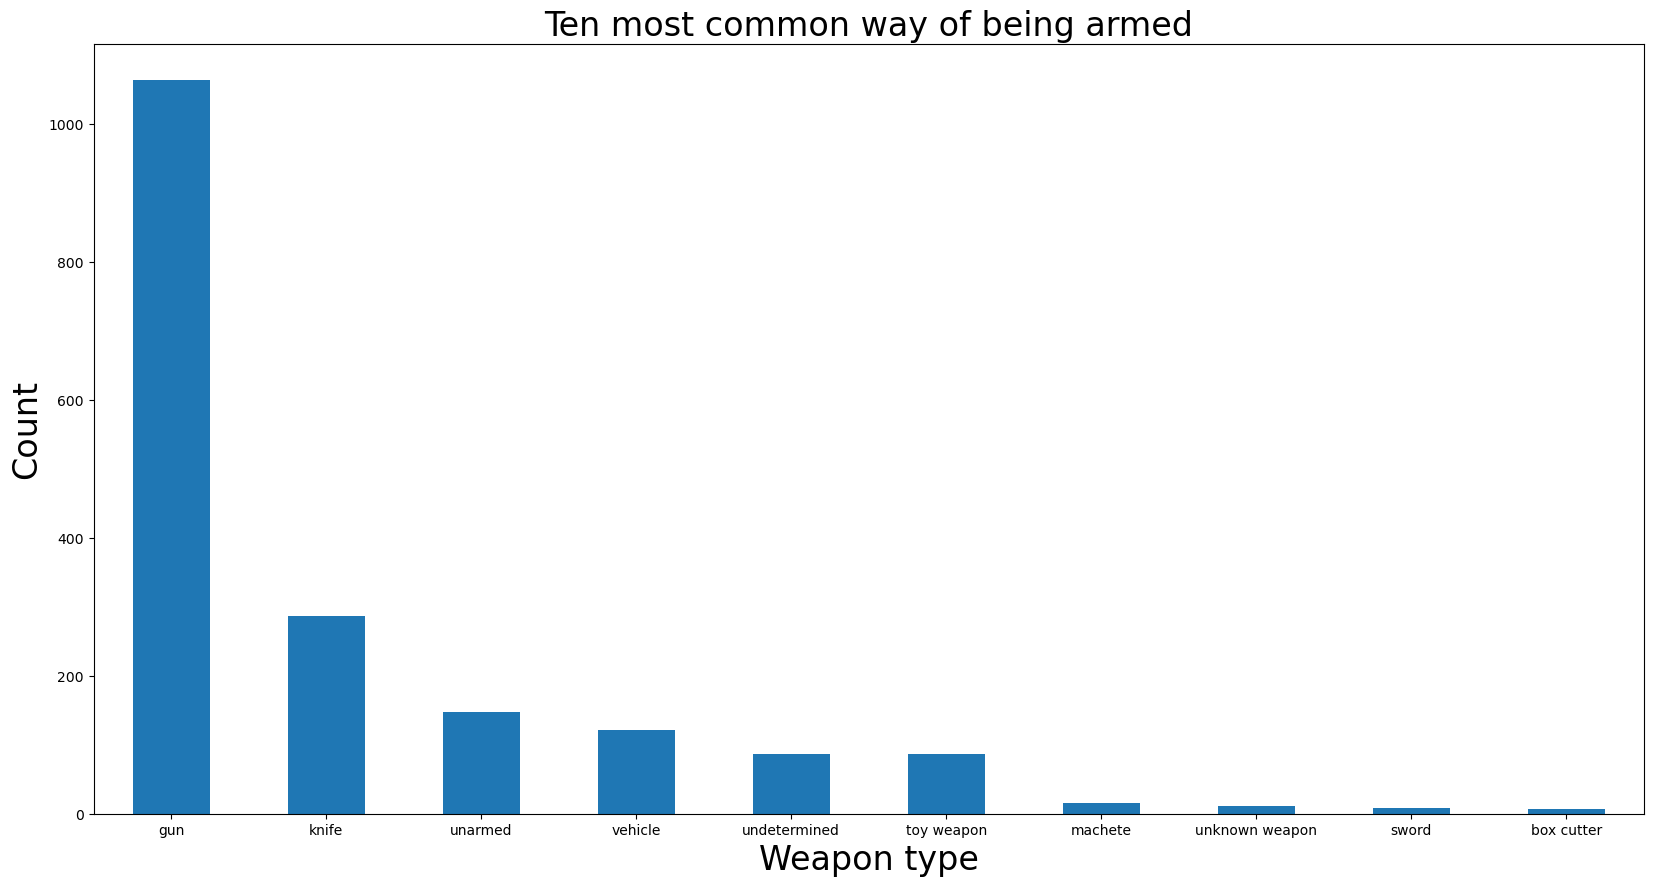

In [2017]:
# plot the bar graph
plt.figure(figsize=(20,10))
ax = train.value_counts("armed").head(10).plot(kind='bar', rot=0)
ax.set_xlabel("Weapon type", fontsize = 24)
ax.set_ylabel("Count", fontsize = 24)
ax.set_title('Ten most common way of being armed', fontsize = 24)
plt.show()


> The bar graph of weapon types shows a nice shape of power distribution curve, from which we can see that gun is the most common way of being armed.

## Age Distribution

### By all races

In [2018]:
# 10 most listed ages of the victims
train.value_counts(["age"]).head(10)


age 
25.0    76
36.0    75
34.0    75
31.0    74
29.0    73
30.0    61
24.0    60
23.0    59
28.0    58
26.0    57
dtype: int64

### The ten most listed ages of all victims range between 20 and 35. The following histogram displays age distribution of all victims.

In [2019]:
train['age'].describe()


count    1932.000000
mean       36.166149
std        12.590792
min         6.000000
25%        26.000000
50%        34.000000
75%        44.250000
max        83.000000
Name: age, dtype: float64

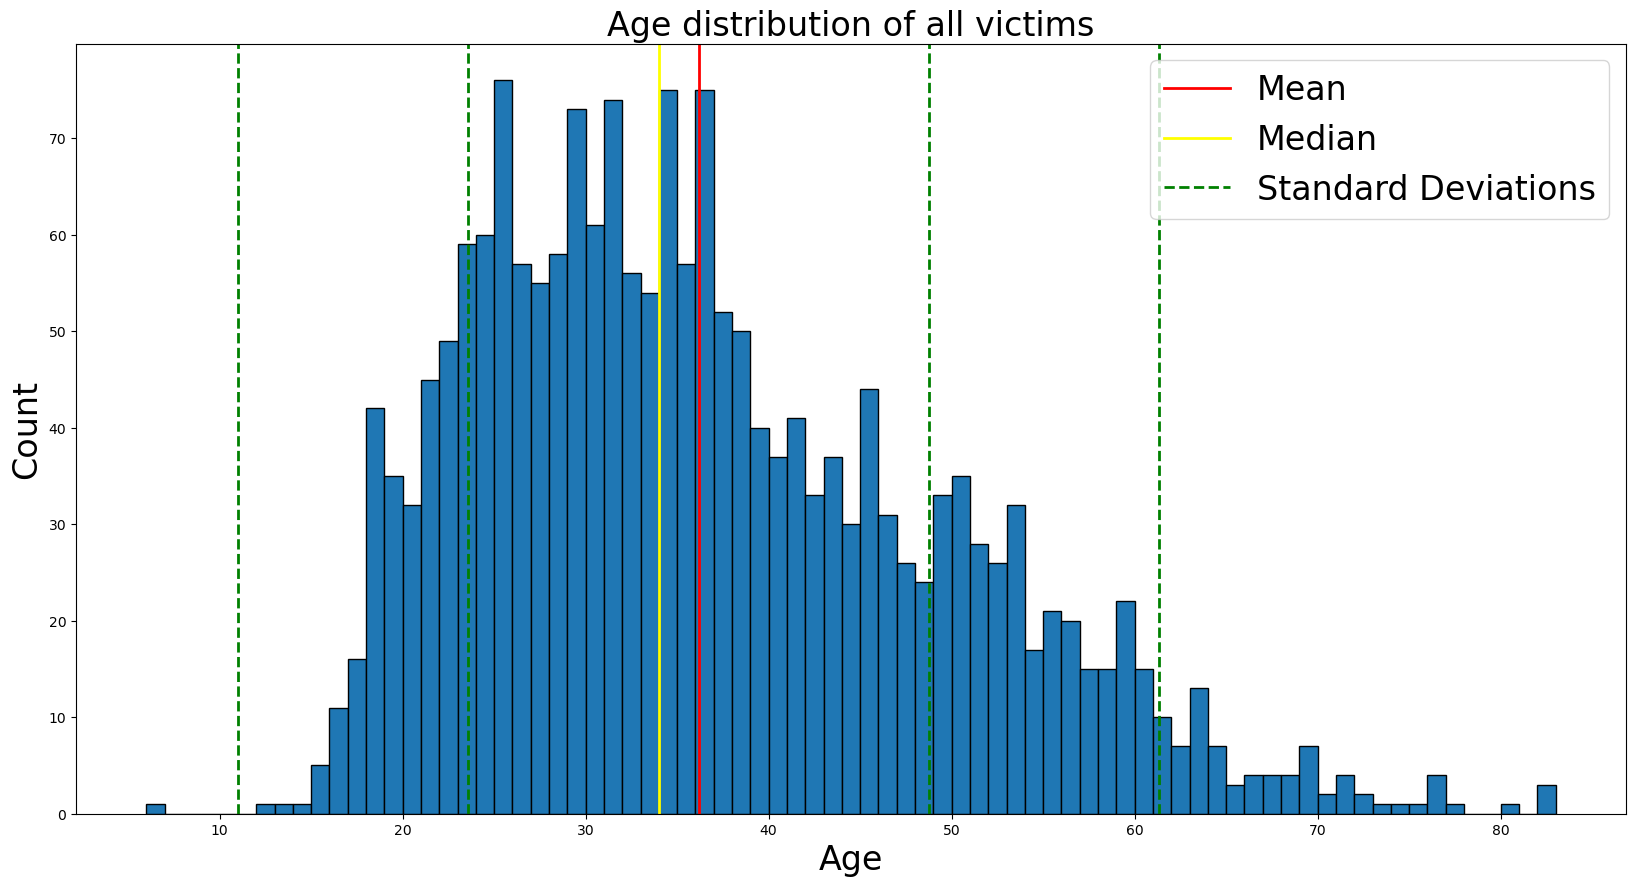

In [2020]:
# age distribution of all victims
plt.figure(figsize=(20,10))
plt.hist(train['age'], bins=np.arange(min(train['age']), max(train['age']+1), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of all victims', fontsize=24)
# more information
mean = train['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = train['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = train['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2021]:
# skewness
skew = 3*(mean - median)/std
skew


0.5161269480395437

> The age distribution of all races is moderately skewed right with skewness of 0.52. The median of ages of all victims is about 34, whereas the mean value is about 36. As a result, the distribution is positive skewed. The standard deviation is about 13. Within one standard deviation (13) from the mean, the age ranges between 24 to 49.

## Specific Race

In [2022]:
# recorded race types
train['race'].unique()


array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

### Race A (Asian)

In [2023]:
race = train[train['race']=='A']
race['age'].describe()


count    31.000000
mean     37.483871
std      11.535080
min      15.000000
25%      29.500000
50%      35.000000
75%      44.000000
max      61.000000
Name: age, dtype: float64

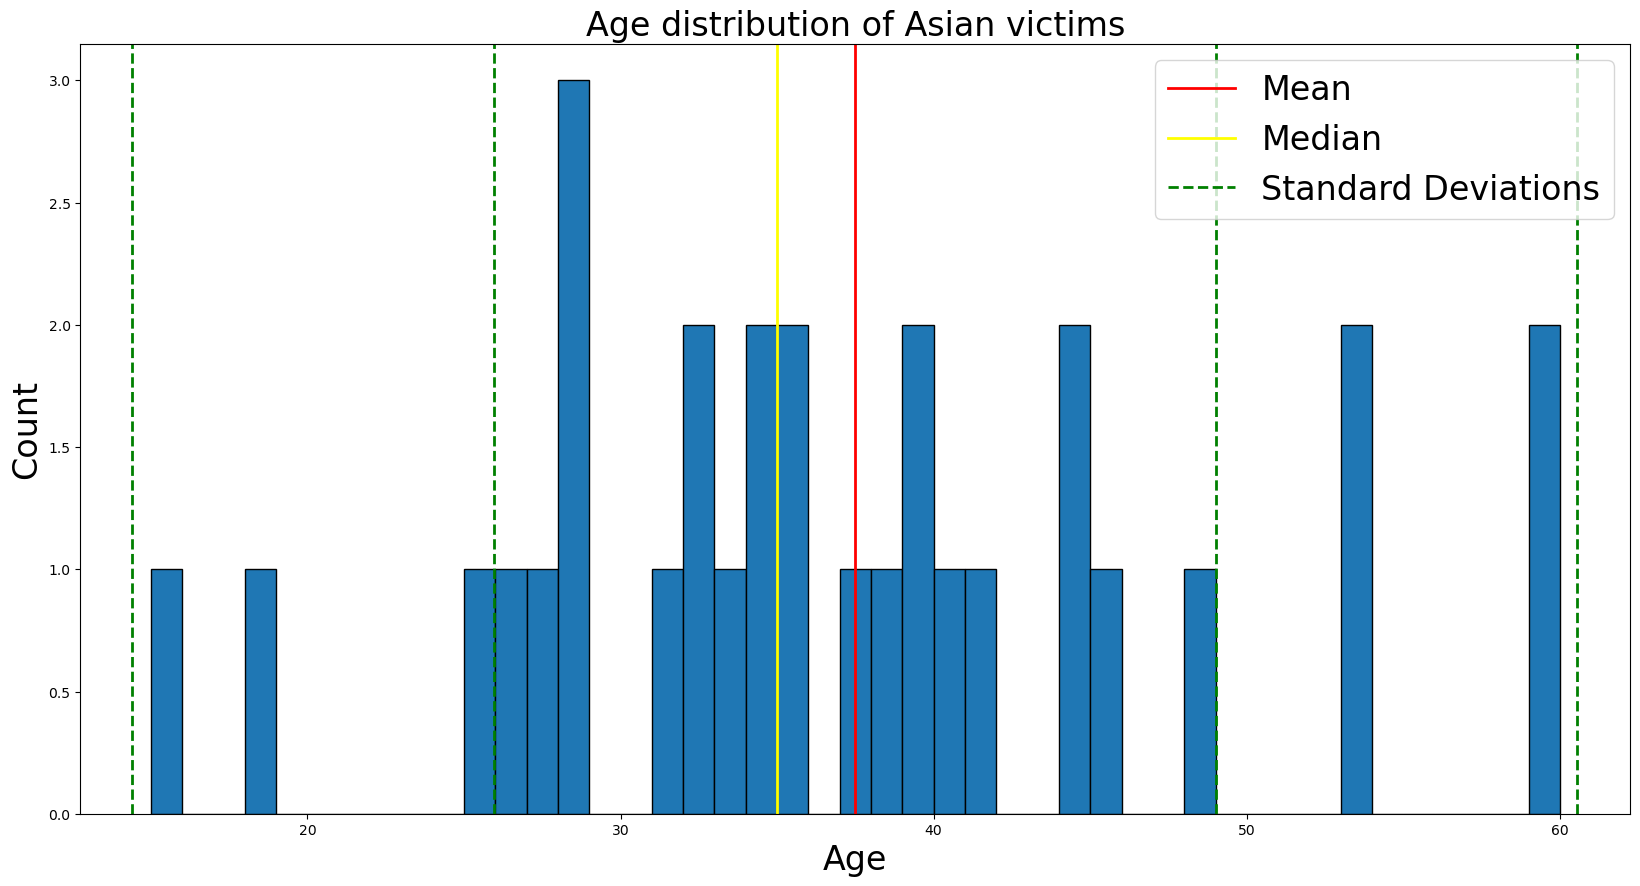

In [2024]:
# age distribution of Asian victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of Asian victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2095]:
# skewness
skew = 3*(mean - median)/std
skew


0.040323891927275445

> The ages of Asian victims are loosely distributed between 15 and 60, and it is moderately skewed right with a skewness of 0.65. The mean value is about 37 and is slightly greater than the median age 35. Within one standard deviation (12) from the mean, the majority data range between 26 to 49.

### Race W (White)

In [2026]:
race = train[train['race']=='W']
race['age'].describe()


count    995.000000
mean      39.763819
std       13.102578
min        6.000000
25%       30.000000
50%       38.000000
75%       50.000000
max       83.000000
Name: age, dtype: float64

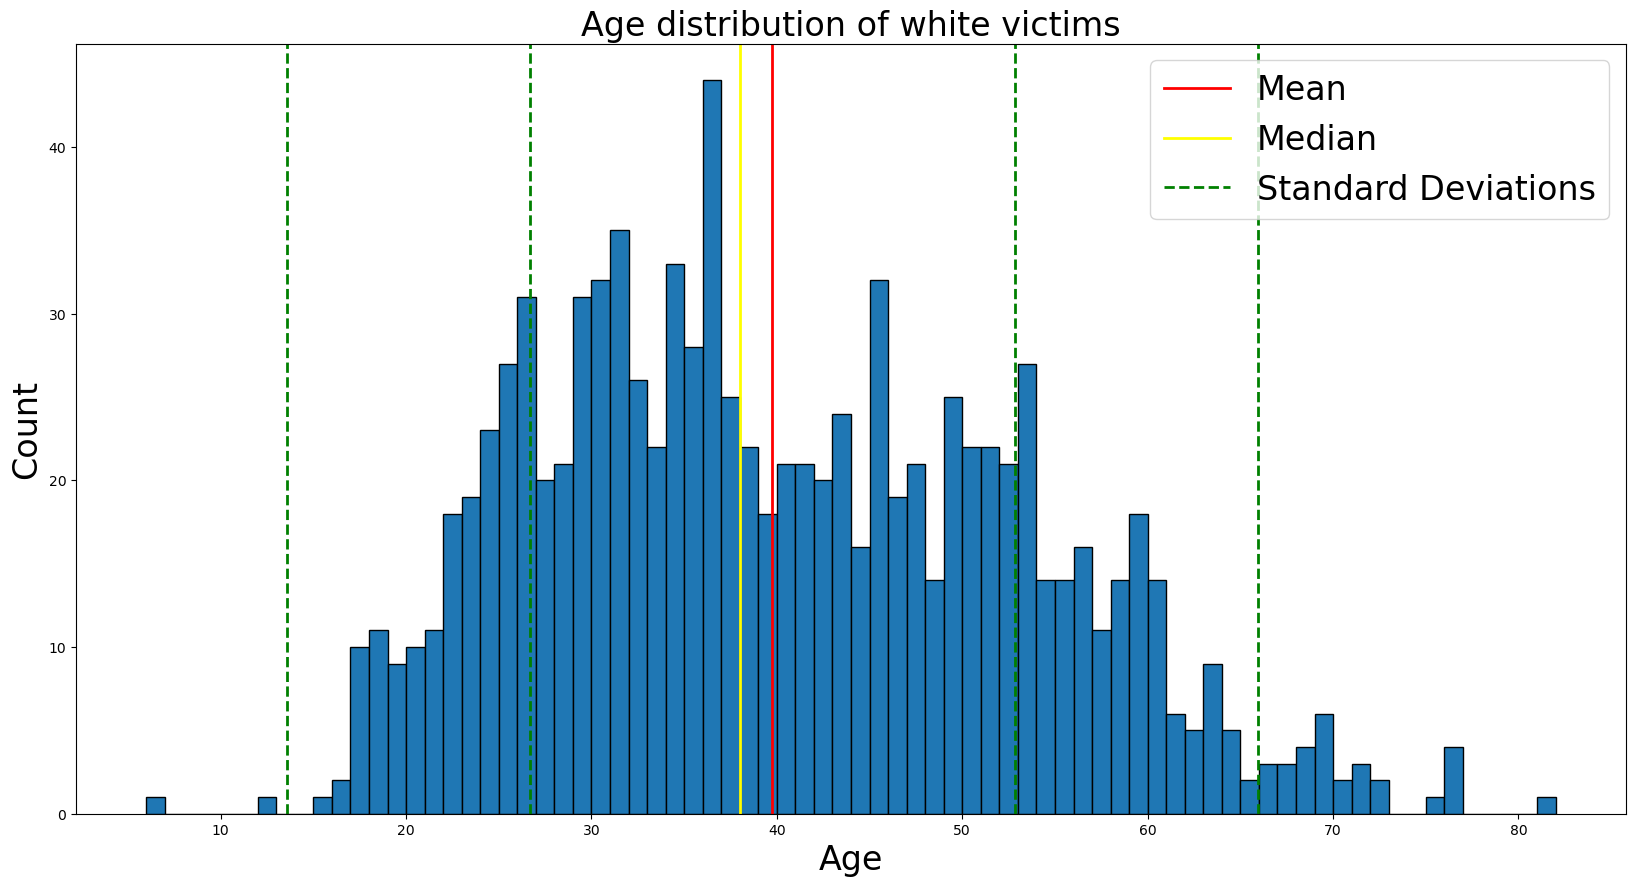

In [2027]:
# age distribution of white victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of white victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2028]:
# skewness
skew = 3*(mean - median)/std
skew


0.40384854735971853

> The age distribution of white victims is approximately symmetric with a skewness of 0.40. The mean is 40, which is slightly greater the median 38. Within one standard deviation (13) from the mean, the ages range between 27 and 53.

### Race H (Hispanic)

In [2029]:
race = train[train['race']=='H']
race['age'].describe()


count    347.000000
mean      33.103746
std       10.603776
min       14.000000
25%       25.000000
50%       32.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

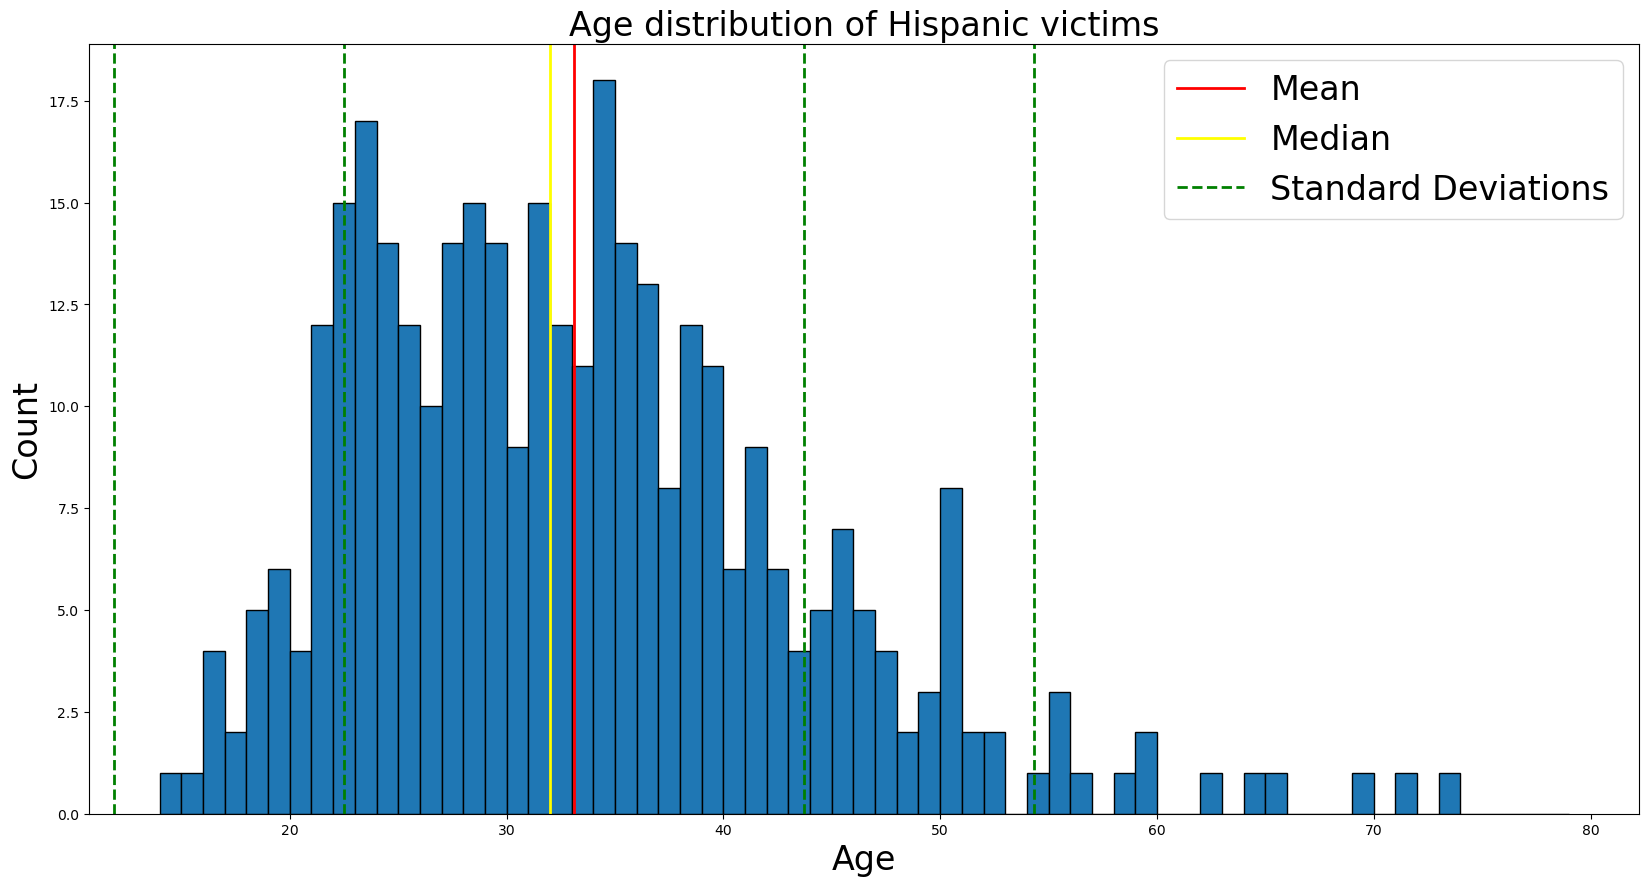

In [2030]:
# age distribution of Hispanic victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of Hispanic victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2031]:
# skewness
skew = 3*(mean - median)/std
skew


0.3122698072361164

> The age distribution of hispanic victims is shaped like a normal distribution. The mean is 33 and is slightly greater the median 32, which results in a skewness of 0.31. Within one standard deviation (11) from the mean, the ages range between 22 and 43.

### Race B (Black)

In [2032]:
race = train[train['race']=='B']
race['age'].describe()


count    504.000000
mean      31.533730
std       10.874435
min       13.000000
25%       24.000000
50%       30.000000
75%       37.000000
max       77.000000
Name: age, dtype: float64

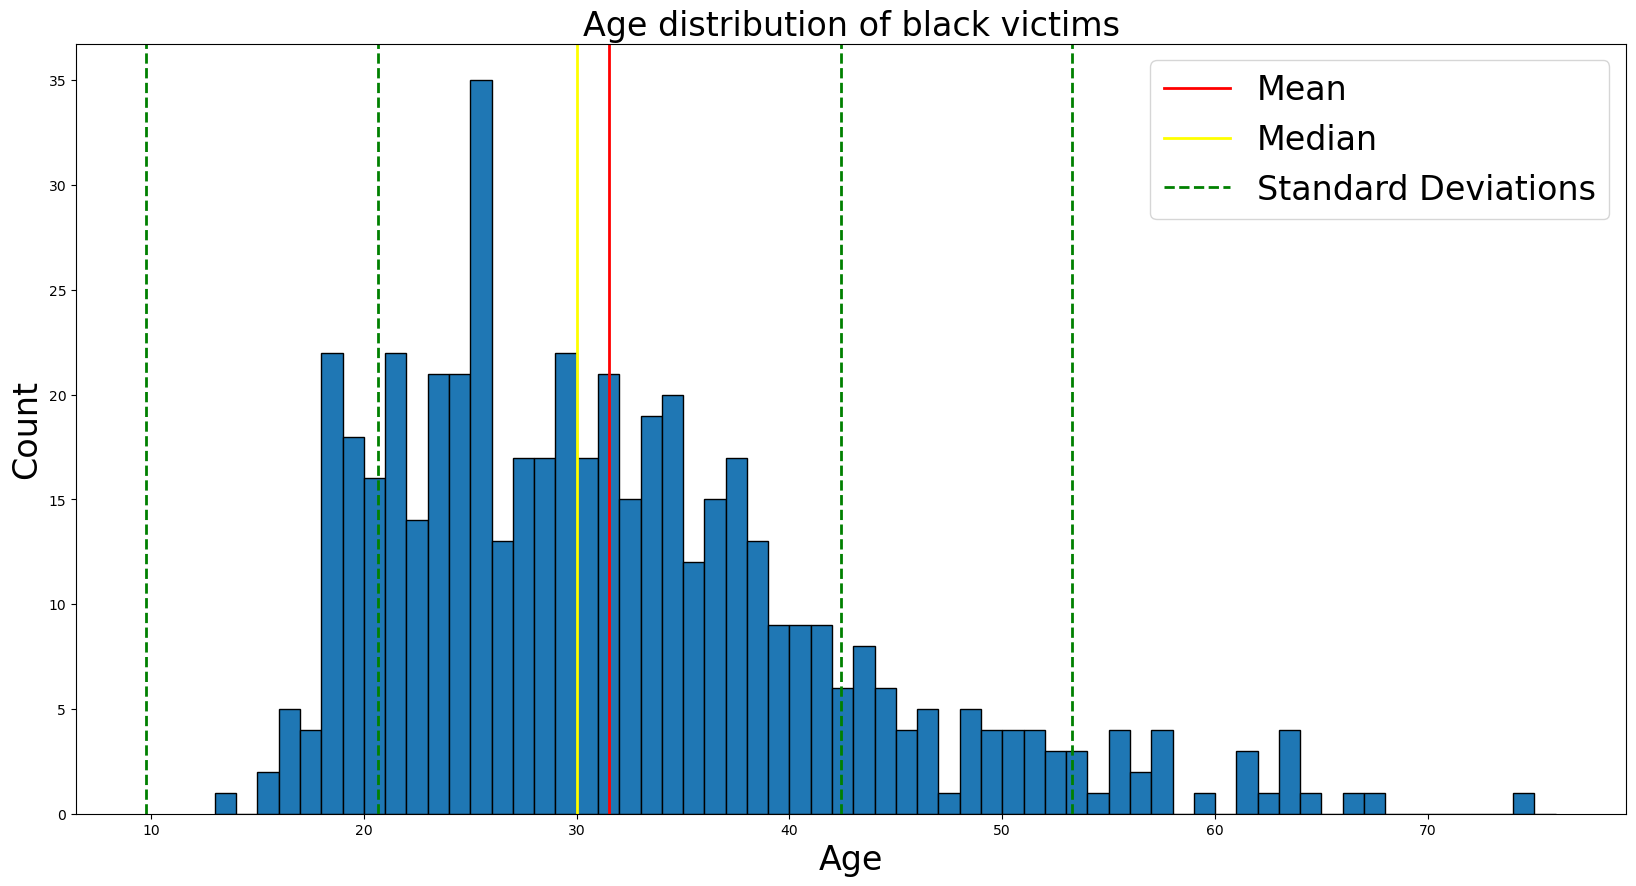

In [2033]:
# age distribution of black victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of black victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2034]:
# skewness
skew = 3*(mean - median)/std
skew


0.4231199636775382

> The age distribution of black victims has a moderate positive skewness (0.42). The mean is 32 and is slightly greater the median 30. Within one standard deviation (11) from the mean, the ages range between 20 and 42.

### Race O (Other)

In [2035]:
race = train[train['race']=='O']
race['age'].describe()


count    28.000000
mean     33.071429
std      11.148588
min      18.000000
25%      26.500000
50%      29.500000
75%      41.250000
max      56.000000
Name: age, dtype: float64

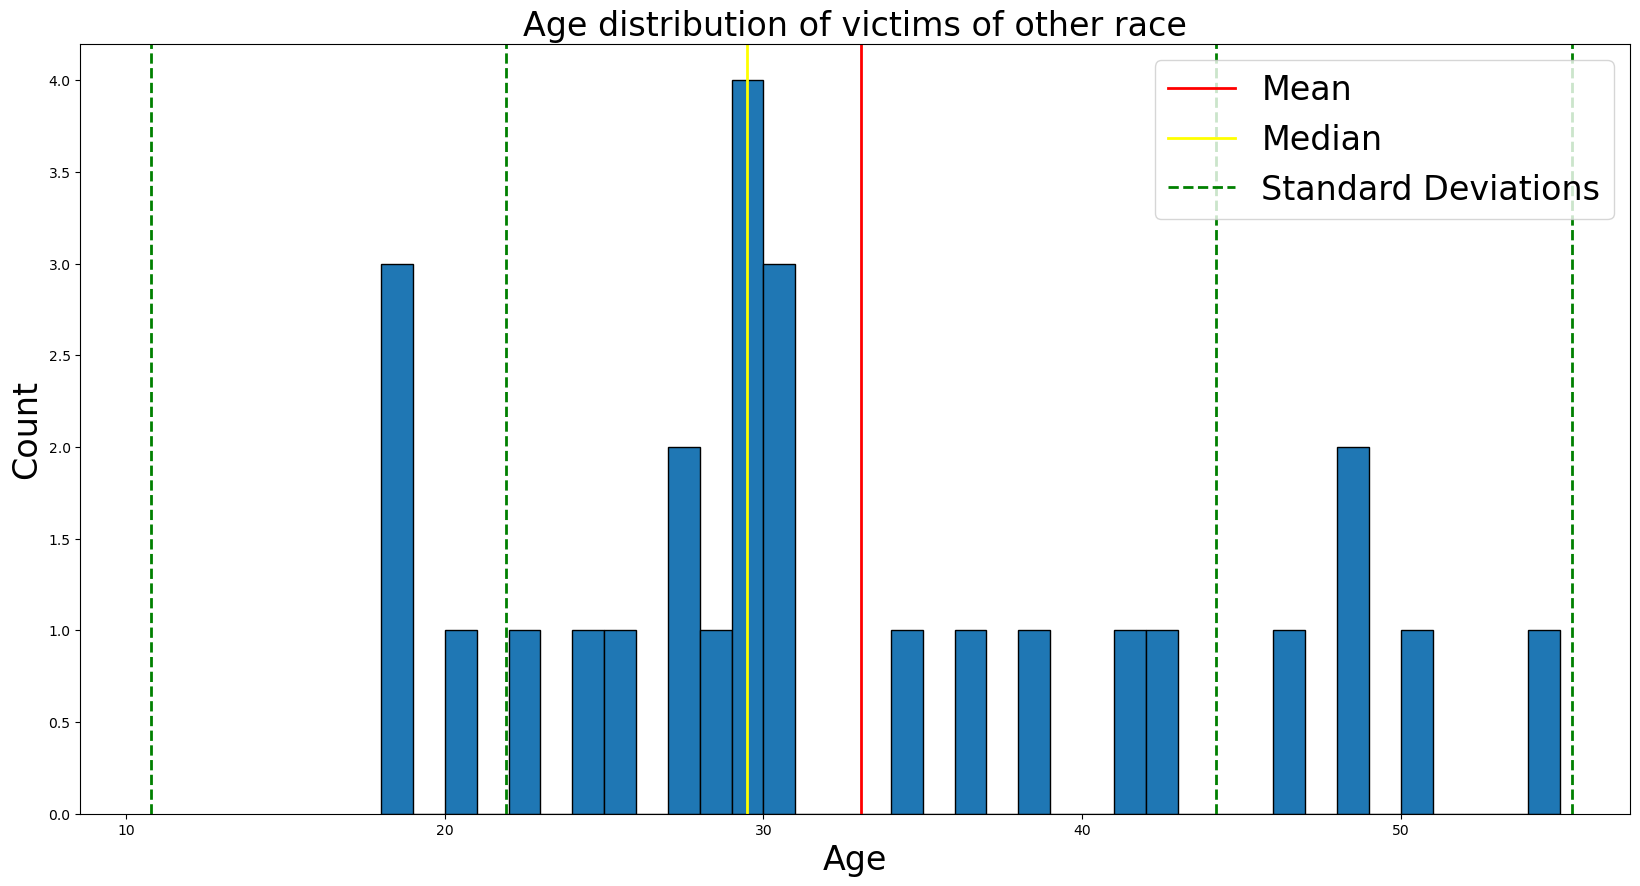

In [2036]:
# age distribution of victims of other race
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of victims of other race', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2037]:
# skewness
skew = 3*(mean - median)/std
skew


0.9610442243114937

> The ages of victims with other races are loosely distributed with a skewness of 0.96. The mean is 33 and is slightly greater the median 29, which results in a skewness of 0.3. Within one standard deviation (11) from the mean, the ages range between 23 and 44.

### Race N (Native American)

In [2038]:
race = train[train['race']=='N']
race['age'].describe()


count    27.000000
mean     31.111111
std       8.266398
min      19.000000
25%      25.000000
50%      31.000000
75%      36.000000
max      49.000000
Name: age, dtype: float64

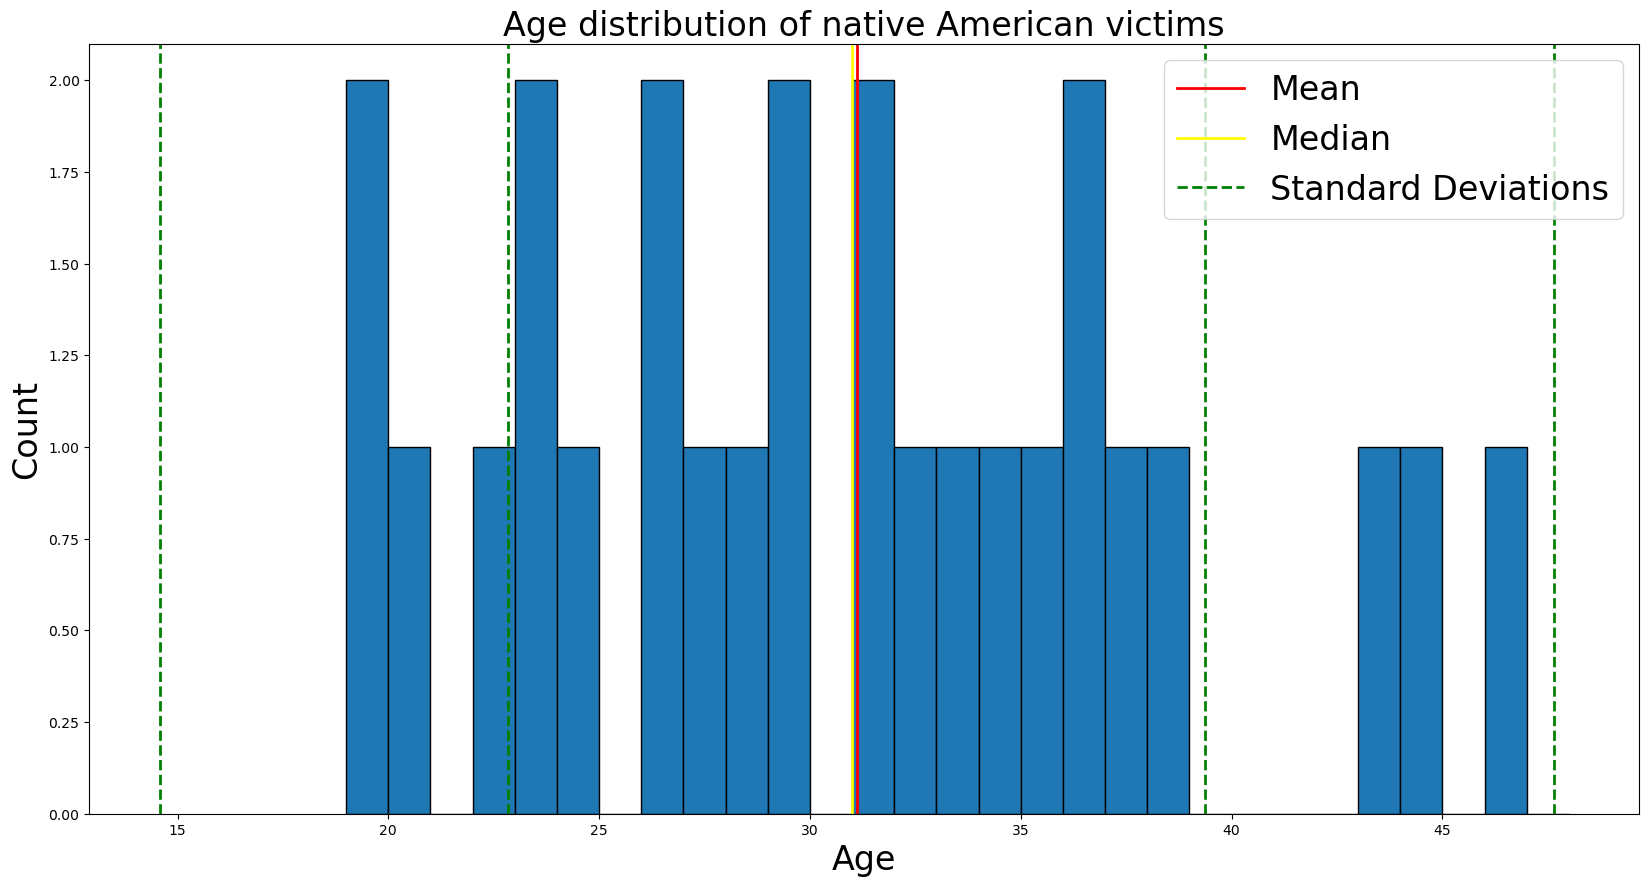

In [2039]:
# age distribution of native American victims
plt.figure(figsize=(20,10))
plt.hist(race['age'], bins=np.arange(min(race['age']), max(race['age']), 1),edgecolor='black')

plt.xlabel('Age', fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Age distribution of native American victims', fontsize=24)
# more information
mean = race['age'].mean()
plt.axvline(mean, color='red', linewidth=2, label='Mean')
median = race['age'].median()
plt.axvline(median, color='yellow', linewidth=2, label='Median')
std = race['age'].std()
stdn2 = mean - 2*std
stdn1 = mean - std
stdp1 = mean + std
stdp2 = mean + 2*std
plt.axvline(stdn2, color='green', linewidth=2, label='Standard Deviations', linestyle='--')
plt.axvline(stdn1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp1, color='green', linewidth=2, linestyle='--')
plt.axvline(stdp2, color='green', linewidth=2, linestyle='--')
plt.legend(fontsize=24)
plt.show()


In [2040]:
# skewness
skew = 3*(mean - median)/std
skew


0.040323891927275445

> The age distribution of native American victims is almost symmetric with a skewness of 0.04. The mean and median are aout 31. Within one standard deviation (8) from the mean, the ages range between 23 and 39.

## Total number of people killed per race

In [2041]:
# total number of people killed per race
train.value_counts(["race"])


race
W       995
B       504
H       347
A        31
O        28
N        27
dtype: int64

### Race ratio

In [2042]:
# number of people killed in each race / total number of people killed in all races
killed_ratio=train['race'].value_counts(normalize=True) * 100
killed_ratio


W    51.501035
B    26.086957
H    17.960663
A     1.604555
O     1.449275
N     1.397516
Name: race, dtype: float64

> More than half of the victims are white people, more than a quarter are black people, and the number of hispanic victims is about 1/5 of the total. The remaining races (Asian, Other, Native Americans) accounted for less than 5 percent of the victims.

## Number of people killed per race as a proportion of respective races

According to the estimated race proportion in the U.S. from 2010 through 2019 by [U.S. Census Bureau](https://www.census.gov/quickfacts/fact/table/US/PST045219):
- White: 60.1%
- Hispanic: 18.8%
- Black: 13.4%
- Asian: 5.9%
- Native Americans: 1.3%
- Other (two or more races): 2.8%
Also, the American population from 2014 to 2017 increases from [320 million to 330 million](https://datacommons.org/tools/timeline#&place=country/USA&statsVar=Count_Person).

In [2043]:
# here, we take the median 325 million as the population constant
p = 325
# white population in millions
wp = 0.601 * p
# hispanic population in millions
hp = 0.188 * p
# black population in millions
bp = 0.134 * p
# Asian population in millions
ap = 0.059 * p
# native American population in millions
np = 0.013 * p
# other race population in millions
op = 0.028 * p
r = ['W', 'B', 'H', 'A', 'O', 'N']
n = train.value_counts('race').tolist()
t = [wp,bp,hp,ap,op,np]
population = pd.DataFrame({'race': r, 'number of killed': n, 'population in millions': t})
population


,race,number of killed,population in millions
0,W,995,195.325
1,B,504,43.550
2,H,347,61.100
3,A,31,19.175
4,O,28,9.100
5,N,27,4.225


In [2044]:
# now, we can calculate the proportion of number of victims in respective race population
proportion = pd.DataFrame({'race': r, 'number of people killed per million': population['number of killed']/population['population in millions']})
proportion


,race,number of people killed per million
0,W,5.094074
1,B,11.572905
2,H,5.679214
3,A,1.616688
4,O,3.076923
5,N,6.390533


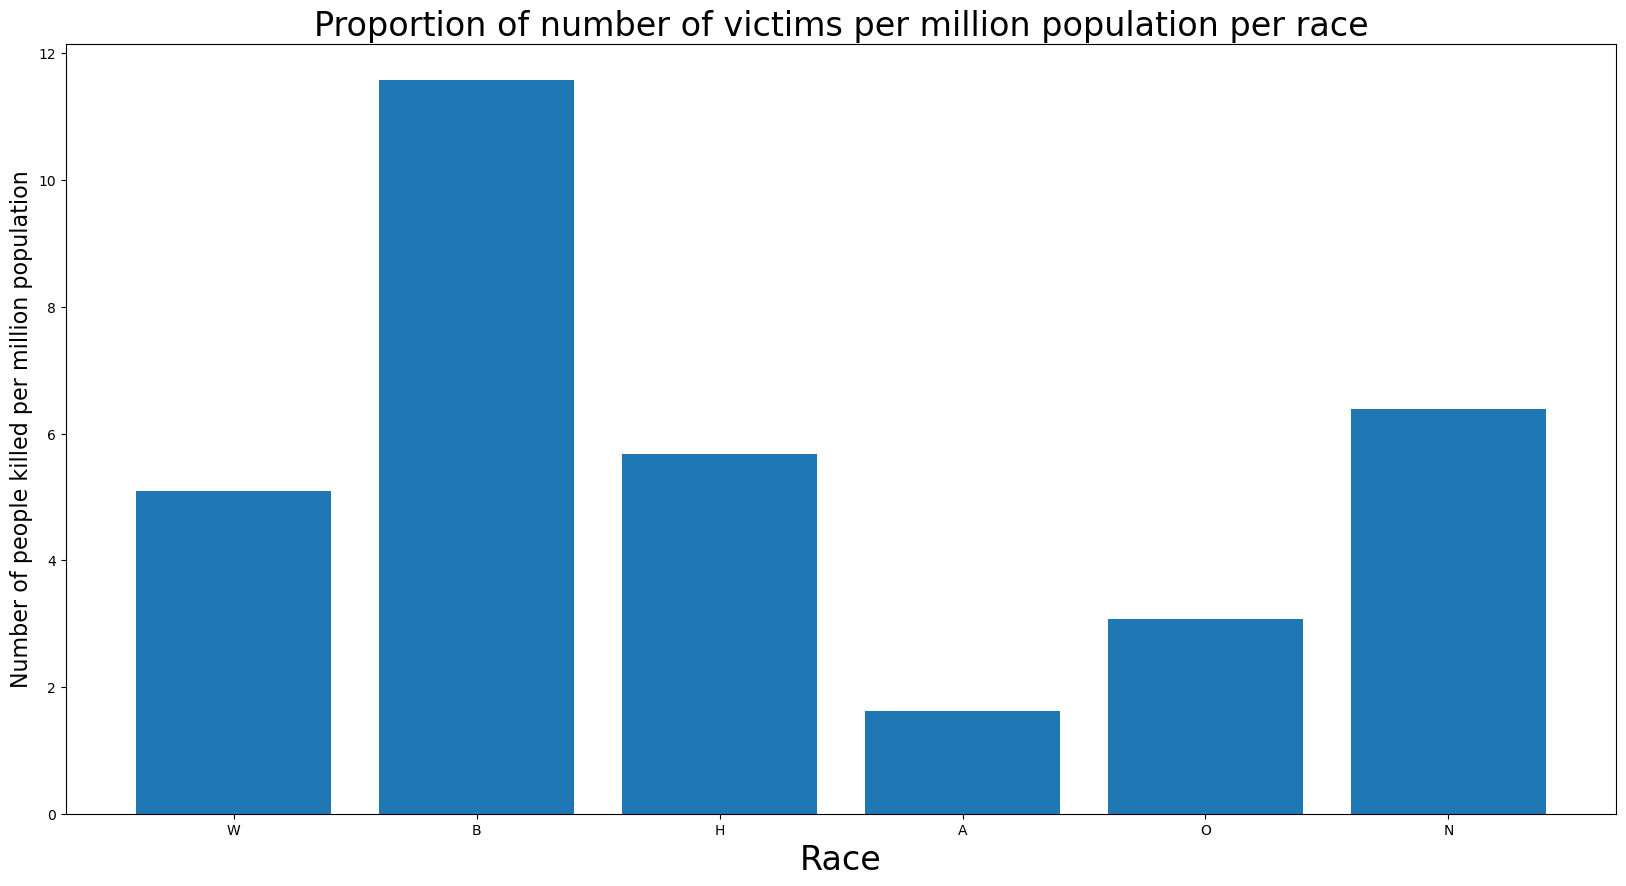

In [2045]:
# plot the bar graph
plt.figure(figsize=(20,10))
plt.bar(x=proportion['race'], height=proportion['number of people killed per million'])
plt.xlabel("Race", fontsize = 24)
plt.ylabel("Number of people killed per million population", fontsize = 16)
plt.title('Proportion of number of victims per million population per race', fontsize = 24)
plt.show()


> From the proportion data and the bar graph we can see that
> - the number of black victims is twice as much as white victims in a scale of per million population of each race
> - the number of native American victims is slightly higher than the number of hispanic victims which is slightly higher than the number of white victims per million population
> - the number of victims with other races (two or more races) is about half of the number of white victims per million population
> - the proportion of number of Asian victims per million population has the least value

# Machine Learning algorithm


In [2046]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_recall_fscore_support


### Data Modified

In [2047]:
train


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,False,attack,Car,False


In [2048]:
merged


,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.200000,11207.000000,78.800000,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,69.100000,25615.000000,29.100000,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,78.900000,42575.000000,25.500000,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.400000,37083.000000,30.700000,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,68.600000,21667.000000,42.000000,13.2,86.5,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...
29472,WV,Summersville town,82.345050,39097.117318,21.134406,97.4,0.4,0.3,0.9,1.4
29473,WV,Upper Falls CDP,82.345050,39097.117318,21.134406,96.8,1.1,0.4,0.3,0.4
29474,WI,Delwood CDP,90.263964,50411.400778,12.858687,98.6,0.2,0.4,0.2,0.2
29475,WI,Lake Shangrila CDP,90.263964,50411.400778,12.858687,95.1,2.2,0.1,0.1,4.8


### city names do not match; for exmaple, 
- train`[`'city'`]` = 'New York', merged`[`'city'`]`  = 'New York City'
- train`[`'city'`]` = 'Oregon City', merged`[`'city'`]`  = 'Oregon City city'

In [2049]:
# delete the last word in merged['city'] for city name comformity
merged.city=merged.city.apply(lambda x: ' '.join(x.split()[:-1]))
merged


,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,21.200000,11207.000000,78.800000,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville,69.100000,25615.000000,29.100000,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville,78.900000,42575.000000,25.500000,52.3,44.9,0.5,0.3,2.3
3,AL,Addison,81.400000,37083.000000,30.700000,99.1,0.1,0.0,0.1,0.4
4,AL,Akron,68.600000,21667.000000,42.000000,13.2,86.5,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...
29472,WV,Summersville,82.345050,39097.117318,21.134406,97.4,0.4,0.3,0.9,1.4
29473,WV,Upper Falls,82.345050,39097.117318,21.134406,96.8,1.1,0.4,0.3,0.4
29474,WI,Delwood,90.263964,50411.400778,12.858687,98.6,0.2,0.4,0.2,0.2
29475,WI,Lake Shangrila,90.263964,50411.400778,12.858687,95.1,2.2,0.1,0.1,4.8


In [2050]:
train


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,False,attack,Car,False


In [2051]:
# drop unnecessary columns
train = train.drop(['id','name','date','armed'],axis=1)
train


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,shot,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,shot and Tasered,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,shot,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,shot,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...
2023,shot,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,shot,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,shot and Tasered,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,shot,32.0,M,H,Kuna,ID,False,attack,Car,False


In [2052]:
# drop unnecessary columns
test = test.drop(['id','name','date','armed'],axis=1)
test


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,54.0,M,B,Southaven,MS,False,attack,Not fleeing,False
1,shot,50.0,M,W,Millston,WI,True,attack,Not fleeing,True
2,shot,28.0,M,H,Charlotte,NC,False,other,Car,False
3,shot,59.0,M,W,Overlea,MD,True,attack,Not fleeing,True
4,shot,24.0,M,B,Atlanta,GA,False,other,Car,True
...,...,...,...,...,...,...,...,...,...,...
495,shot,25.0,M,B,Dayton,OH,False,attack,Car,False
497,shot,39.0,M,B,Homer,LA,False,attack,Car,False
500,shot,34.0,M,H,Chowchilla,CA,False,attack,Not fleeing,False
505,shot,28.0,M,B,Oshkosh,WI,False,attack,Car,True


### Label Encoding

In [2053]:
# import encoder
from sklearn import preprocessing
# race encode
race_map = preprocessing.LabelEncoder()
train['race'] = race_map.fit_transform(train['race'])
train['race']


0       0
1       5
2       2
3       5
4       2
       ..
2023    2
2024    5
2025    2
2026    2
2027    5
Name: race, Length: 1932, dtype: int32

In [2054]:
test['race'] = race_map.transform(test['race'])
test['race']


0      1
1      5
2      2
3      5
4      1
      ..
495    1
497    1
500    2
505    1
506    1
Name: race, Length: 403, dtype: int32

In [2055]:
# manner_of_death encode
death_map = preprocessing.LabelEncoder()
train['manner_of_death'] = death_map.fit_transform(train['manner_of_death'])
train['manner_of_death']


0       0
1       0
2       1
3       0
4       0
       ..
2023    0
2024    0
2025    1
2026    0
2027    0
Name: manner_of_death, Length: 1932, dtype: int32

In [2056]:
test['manner_of_death'] = death_map.transform(test['manner_of_death'])
test['manner_of_death']


0      0
1      0
2      0
3      0
4      0
      ..
495    0
497    0
500    0
505    0
506    0
Name: manner_of_death, Length: 403, dtype: int32

In [2057]:
# gender encode
gender_map = preprocessing.LabelEncoder()
train['gender'] = gender_map.fit_transform(train['gender'])
train['gender']


0       1
1       1
2       1
3       1
4       1
       ..
2023    1
2024    1
2025    1
2026    1
2027    1
Name: gender, Length: 1932, dtype: int32

In [2058]:
test['gender'] = gender_map.transform(test['gender'])
test['gender']


0      1
1      1
2      1
3      1
4      1
      ..
495    1
497    1
500    1
505    1
506    1
Name: gender, Length: 403, dtype: int32

In [2059]:
# signs_of_mental_illness encode
signs_of_mental_illness_map = preprocessing.LabelEncoder()
train['signs_of_mental_illness'] = signs_of_mental_illness_map.fit_transform(train['signs_of_mental_illness'])
train['signs_of_mental_illness']


0       1
1       0
2       0
3       1
4       0
       ..
2023    1
2024    1
2025    0
2026    0
2027    1
Name: signs_of_mental_illness, Length: 1932, dtype: int64

In [2060]:
test['signs_of_mental_illness'] = signs_of_mental_illness_map.transform(test['signs_of_mental_illness'])
test['signs_of_mental_illness']


0      0
1      1
2      0
3      1
4      0
      ..
495    0
497    0
500    0
505    0
506    1
Name: signs_of_mental_illness, Length: 403, dtype: int64

In [2061]:
# threat_level encode
threat_level_map = preprocessing.LabelEncoder()
train['threat_level'] = threat_level_map.fit_transform(train['threat_level'])
train['threat_level']


0       0
1       0
2       1
3       0
4       0
       ..
2023    0
2024    0
2025    0
2026    0
2027    0
Name: threat_level, Length: 1932, dtype: int32

In [2062]:
test['threat_level'] = threat_level_map.transform(test['threat_level'])
test['threat_level']


0      0
1      0
2      1
3      0
4      1
      ..
495    0
497    0
500    0
505    0
506    0
Name: threat_level, Length: 403, dtype: int32

In [2063]:
# flee encode
flee_map = preprocessing.LabelEncoder()
train['flee'] = flee_map.fit_transform(train['flee'])
train['flee']


0       2
1       2
2       2
3       2
4       2
       ..
2023    1
2024    2
2025    2
2026    0
2027    0
Name: flee, Length: 1932, dtype: int32

In [2064]:
test['flee'] = flee_map.transform(test['flee'])
test['flee']


0      2
1      2
2      0
3      2
4      0
      ..
495    0
497    0
500    2
505    0
506    2
Name: flee, Length: 403, dtype: int32

In [2065]:
# body_camera encode
body_camera_map = preprocessing.LabelEncoder()
train['body_camera'] = body_camera_map.fit_transform(train['body_camera'])
train['body_camera']


0       0
1       0
2       0
3       0
4       0
       ..
2023    1
2024    0
2025    0
2026    0
2027    0
Name: body_camera, Length: 1932, dtype: int64

In [2066]:
test['body_camera'] = body_camera_map.transform(test['body_camera'])
test['body_camera']


0      0
1      1
2      0
3      1
4      1
      ..
495    0
497    0
500    0
505    1
506    0
Name: body_camera, Length: 403, dtype: int64

## Merge **City Data** and **Victim Data**

## Balancing Victim Data

In [2067]:
train.race.value_counts()


5    995
1    504
2    347
0     31
4     28
3     27
Name: race, dtype: int64

In [2068]:
from sklearn.utils import resample
# split into majority and minorities
minor0 = train[train.race==0]
minor1 = train[train.race==1]
minor2 = train[train.race==2]
minor3 = train[train.race==3]
minor4 = train[train.race==4]
major = train[train.race==5]

# Upsample minority classes
minor0_up = resample(minor0, replace=True, n_samples=major.race.value_counts().tolist()[0], random_state=100)
minor1_up = resample(minor1, replace=True, n_samples=major.race.value_counts().tolist()[0], random_state=100)
minor2_up = resample(minor2, replace=True, n_samples=major.race.value_counts().tolist()[0], random_state=100)
minor3_up = resample(minor3, replace=True, n_samples=major.race.value_counts().tolist()[0], random_state=100)
minor4_up = resample(minor4, replace=True, n_samples=major.race.value_counts().tolist()[0], random_state=100)
# combine
train = pd.concat([minor0_up,minor1_up,minor2_up,minor3_up,minor4_up,major])
# display new counts
train.race.value_counts()


0    995
1    995
2    995
3    995
4    995
5    995
Name: race, dtype: int64

In [2069]:
# merge City Data and Victim Data
train_merge = pd.merge(train,merged, on=['state','city'], how = 'outer', indicator=True)
train_merge


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,_merge
0,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.800000,38085.000000,24.900000,38.8,0.8,1.0,25.1,69.0,both
1,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.800000,38085.000000,24.900000,38.8,0.8,1.0,25.1,69.0,both
2,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.800000,38085.000000,24.900000,38.8,0.8,1.0,25.1,69.0,both
3,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.800000,38085.000000,24.900000,38.8,0.8,1.0,25.1,69.0,both
4,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.800000,38085.000000,24.900000,38.8,0.8,1.0,25.1,69.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,NaN,NaN,NaN,NaN,Riverton,WA,NaN,NaN,NaN,NaN,88.197577,59315.282230,15.017609,49.6,9.6,1.6,15.2,26.4,right_only
34461,NaN,NaN,NaN,NaN,Upper Falls,WV,NaN,NaN,NaN,NaN,82.345050,39097.117318,21.134406,96.8,1.1,0.4,0.3,0.4,right_only
34462,NaN,NaN,NaN,NaN,Delwood,WI,NaN,NaN,NaN,NaN,90.263964,50411.400778,12.858687,98.6,0.2,0.4,0.2,0.2,right_only
34463,NaN,NaN,NaN,NaN,Lake Shangrila,WI,NaN,NaN,NaN,NaN,90.263964,50411.400778,12.858687,95.1,2.2,0.1,0.1,4.8,right_only


In [2070]:
# keep rows with full Victim Data
train_merge = train_merge[train_merge['_merge'].isin(['both','left_only'])].drop('_merge', axis=1)
train_merge


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
1,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
2,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
3,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
4,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.0,57.0,1.0,5.0,Waldoboro,ME,0.0,0.0,2.0,0.0,98.4,17614.0,42.3,96.5,0.1,0.4,0.6,1.9
5972,0.0,52.0,1.0,5.0,Brooklet,GA,0.0,0.0,1.0,0.0,93.2,55185.0,10.5,85.1,11.5,0.4,0.3,1.6
5973,0.0,27.0,1.0,5.0,Springfield,IL,1.0,0.0,2.0,1.0,90.8,49868.0,19.5,75.8,18.5,0.2,2.2,2.0
5974,0.0,30.0,1.0,5.0,Algoma Township,MI,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2071]:
# median imputation for missing City Data
train_merge = train_merge.fillna(train_merge.median(numeric_only=True))
train_merge


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
1,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
2,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
3,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
4,0.0,59.0,1.0,0.0,El Monte,CA,0.0,0.0,2.0,0.0,57.8,38085.0,24.9,38.8,0.8,1.0,25.1,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.0,57.0,1.0,5.0,Waldoboro,ME,0.0,0.0,2.0,0.0,98.4,17614.0,42.3,96.5,0.1,0.4,0.6,1.9
5972,0.0,52.0,1.0,5.0,Brooklet,GA,0.0,0.0,1.0,0.0,93.2,55185.0,10.5,85.1,11.5,0.4,0.3,1.6
5973,0.0,27.0,1.0,5.0,Springfield,IL,1.0,0.0,2.0,1.0,90.8,49868.0,19.5,75.8,18.5,0.2,2.2,2.0
5974,0.0,30.0,1.0,5.0,Algoma Township,MI,1.0,0.0,2.0,0.0,85.1,47611.0,20.2,61.5,6.7,0.7,3.4,18.4


In [2072]:
train_merge.isnull().sum()


manner_of_death            0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
percent_completed_hs       0
Median Income              0
poverty_rate               0
share_white                0
share_black                0
share_native_american      0
share_asian                0
share_hispanic             0
dtype: int64

In [2073]:
# merge City Data and Victim Data for testing set
test_merge = pd.merge(test,merged, on=['state','city'], how = 'outer', indicator=True)
test_merge


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,_merge
0,0.0,54.0,1.0,1.0,Southaven,MS,0.0,0.0,2.0,0.0,88.400000,58227.000000,11.400000,71.0,22.2,0.3,1.7,5.0,both
1,0.0,41.0,1.0,2.0,Southaven,MS,0.0,0.0,2.0,0.0,88.400000,58227.000000,11.400000,71.0,22.2,0.3,1.7,5.0,both
2,0.0,50.0,1.0,5.0,Millston,WI,1.0,0.0,2.0,1.0,82.000000,50536.000000,14.700000,96.0,0.0,3.2,0.0,2.4,both
3,0.0,28.0,1.0,2.0,Charlotte,NC,0.0,1.0,0.0,0.0,88.400000,53637.000000,16.800000,50.0,35.0,0.5,5.0,13.1,both
4,0.0,25.0,1.0,5.0,Charlotte,NC,1.0,1.0,2.0,0.0,88.400000,53637.000000,16.800000,50.0,35.0,0.5,5.0,13.1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29589,NaN,NaN,NaN,NaN,Riverton,WA,NaN,NaN,NaN,NaN,88.197577,59315.282230,15.017609,49.6,9.6,1.6,15.2,26.4,right_only
29590,NaN,NaN,NaN,NaN,Upper Falls,WV,NaN,NaN,NaN,NaN,82.345050,39097.117318,21.134406,96.8,1.1,0.4,0.3,0.4,right_only
29591,NaN,NaN,NaN,NaN,Delwood,WI,NaN,NaN,NaN,NaN,90.263964,50411.400778,12.858687,98.6,0.2,0.4,0.2,0.2,right_only
29592,NaN,NaN,NaN,NaN,Lake Shangrila,WI,NaN,NaN,NaN,NaN,90.263964,50411.400778,12.858687,95.1,2.2,0.1,0.1,4.8,right_only


In [2074]:
# keep rows with full Victim Data
test_merge = test_merge[test_merge['_merge'].isin(['both','left_only'])].drop('_merge', axis=1)
test_merge


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,0.0,54.0,1.0,1.0,Southaven,MS,0.0,0.0,2.0,0.0,88.4,58227.0,11.4,71.0,22.2,0.3,1.7,5.0
1,0.0,41.0,1.0,2.0,Southaven,MS,0.0,0.0,2.0,0.0,88.4,58227.0,11.4,71.0,22.2,0.3,1.7,5.0
2,0.0,50.0,1.0,5.0,Millston,WI,1.0,0.0,2.0,1.0,82.0,50536.0,14.7,96.0,0.0,3.2,0.0,2.4
3,0.0,28.0,1.0,2.0,Charlotte,NC,0.0,1.0,0.0,0.0,88.4,53637.0,16.8,50.0,35.0,0.5,5.0,13.1
4,0.0,25.0,1.0,5.0,Charlotte,NC,1.0,1.0,2.0,0.0,88.4,53637.0,16.8,50.0,35.0,0.5,5.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,16.0,1.0,1.0,Marion,AR,0.0,2.0,2.0,0.0,89.3,61669.0,10.9,68.1,28.0,0.4,1.5,2.0
399,0.0,25.0,1.0,1.0,Dayton,OH,0.0,0.0,0.0,0.0,82.1,27683.0,35.5,51.7,42.9,0.3,0.9,3.0
400,0.0,39.0,1.0,1.0,Homer,LA,0.0,0.0,0.0,0.0,79.0,27050.0,40.0,33.0,64.3,0.1,0.8,1.4
401,0.0,34.0,1.0,2.0,Chowchilla,CA,0.0,0.0,2.0,0.0,68.3,34559.0,32.1,61.6,12.6,2.0,2.1,37.8


In [2075]:
# median imputation for missing City Data
test_merge = test_merge.fillna(test_merge.median(numeric_only=True))
test_merge


,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,0.0,54.0,1.0,1.0,Southaven,MS,0.0,0.0,2.0,0.0,88.4,58227.0,11.4,71.0,22.2,0.3,1.7,5.0
1,0.0,41.0,1.0,2.0,Southaven,MS,0.0,0.0,2.0,0.0,88.4,58227.0,11.4,71.0,22.2,0.3,1.7,5.0
2,0.0,50.0,1.0,5.0,Millston,WI,1.0,0.0,2.0,1.0,82.0,50536.0,14.7,96.0,0.0,3.2,0.0,2.4
3,0.0,28.0,1.0,2.0,Charlotte,NC,0.0,1.0,0.0,0.0,88.4,53637.0,16.8,50.0,35.0,0.5,5.0,13.1
4,0.0,25.0,1.0,5.0,Charlotte,NC,1.0,1.0,2.0,0.0,88.4,53637.0,16.8,50.0,35.0,0.5,5.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,16.0,1.0,1.0,Marion,AR,0.0,2.0,2.0,0.0,89.3,61669.0,10.9,68.1,28.0,0.4,1.5,2.0
399,0.0,25.0,1.0,1.0,Dayton,OH,0.0,0.0,0.0,0.0,82.1,27683.0,35.5,51.7,42.9,0.3,0.9,3.0
400,0.0,39.0,1.0,1.0,Homer,LA,0.0,0.0,0.0,0.0,79.0,27050.0,40.0,33.0,64.3,0.1,0.8,1.4
401,0.0,34.0,1.0,2.0,Chowchilla,CA,0.0,0.0,2.0,0.0,68.3,34559.0,32.1,61.6,12.6,2.0,2.1,37.8


In [2076]:
test_merge.isnull().sum()


manner_of_death            0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
percent_completed_hs       0
Median Income              0
poverty_rate               0
share_white                0
share_black                0
share_native_american      0
share_asian                0
share_hispanic             0
dtype: int64

## Correlation Heat Map

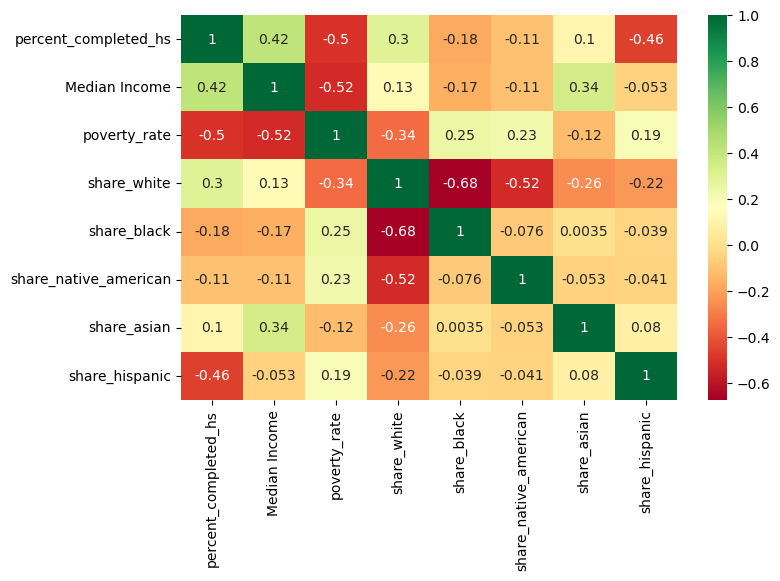

In [2077]:
plt.subplots(figsize=(8, 5))
sns.heatmap(merged.drop(['state', 'city'],axis=1).corr(), annot=True, cmap="RdYlGn")
plt.show()


From the heat map above, we can see that
- **percent_completed_hs** has 
  - **moderate positive correlation** (0.42) with **Median Income**
  - **moderate negative correlation** (-0.5) with **poverty_rate**
  - **moderate negative correlation** (-0.46) with **share_hispanic**
- **Median Income** has
  - **moderate negative correlation** (-0.52) with **poverty_rate**
- **share_white**
  - **strong negative correlation** (-0.68) with **share_black**
  - **moderate negative correlation** (-0.52) with **share_native_american**

Possible explanations:
- percent_completed_hs:
  - community with higher educated rate may have a higher median income
  - community with higher educated rate may have a lower poverty rate
  - community with higher educated rate may have a lower percentage of hispanic members
- Median Income:
  - community with higher median income may have a much lower poverty rate
- share_white:
  - community with higher percentage of white members may imply a much lower percentage of black members
  - community with higher percentage of white members may have a lower percentage of hispanic members

> Based on the correlation heat map, we can select some features from **City Data** with low correlations. The following subsets of features are tested.

In [2078]:
# 1. Max accu = 0.55, Max f1 = 0.56 in RForst
#    NBayes:    accu = 0.48, f1 = 0.50
#    KNN:       accu = 0.42, f1 = 0.45
#    RForest:   accu = 0.55, f1 = 0.56
#    GradientB: accu = 0.41, f1 = 0.48
# features = ['percent_completed_hs','share_white', 'share_asian']

# 2. Max accu = 0.56, Max f1 = 0.60 in NBayes
#    NBayes:    accu = 0.56, f1 = 0.60
#    KNN:       accu = 0.53, f1 = 0.54
#    RForest:   accu = 0.54, f1 = 0.55
#    GradientB: accu = 0.53, f1 = 0.56
# features = ['percent_completed_hs','share_black', 'share_native_american','share_asian','share_hispanic']

# 3. Max accu = 0.52, Max f1 = 0.53 in RForst
#    NBayes:    accu = 0.39, f1 = 0.40
#    KNN:       accu = 0.37, f1 = 0.39
#    RForest:   accu = 0.52, f1 = 0.53
#    GradientB: accu = 0.39, f1 = 0.46
# features = ['Median Income','share_white', 'share_asian']

# 4. Max accu = 0.57 in RForest, Max f1 = 0.59 in NBayes
#    NBayes:    accu = 0.56, f1 = 0.59
#    KNN:       accu = 0.39, f1 = 0.42
#    RForest:   accu = 0.57, f1 = 0.57
#    GradientB: accu = 0.51, f1 = 0.55
# features = ['Median Income','share_black', 'share_native_american','share_asian','share_hispanic']

# 5. Max accu = 0.45 in RForest, Max f1 = 0.48 in NBayes
#    NBayes:    accu = 0.44, f1 = 0.48
#    KNN:       accu = 0.41, f1 = 0.44
#    RForest:   accu = 0.45, f1 = 0.47
#    GradientB: accu = 0.36, f1 = 0.44
# features = ['poverty_rate', 'share_white', 'share_asian']

# 6. Max accu = 0.53 in RForest, Max f1 = 0.56 in GradientB
#    NBayes:    accu = 0.49, f1 = 0.53
#    KNN:       accu = 0.53, f1 = 0.54
#    RForest:   accu = 0.53, f1 = 0.54
#    GradientB: accu = 0.52, f1 = 0.56
# features = ['poverty_rate', 'share_black', 'share_native_american','share_asian','share_hispanic']

# 7. Max accu = 0.43 in NBayes, Max f1 = 0.44 in KNN
#    NBayes:    accu = 0.43, f1 = 0.43
#    KNN:       accu = 0.40, f1 = 0.44
#    RForest:   accu = 0.42, f1 = 0.44
#    GradientB: accu = 0.34, f1 = 0.41
# features = ['share_white','share_asian']

# 8. Max accu = 0.50, Max f1 =0.54 in GradientB
#    NBayes:    accu = 0.41, f1 = 0.44
#    KNN:       accu = 0.42, f1 = 0.44
#    RForest:   accu = 0.48, f1 = 0.49
#    GradientB: accu = 0.50, f1 = 0.54
# features = ['share_black', 'share_native_american','share_asian','share_hispanic']

# 9. Max accu = 0.57, Max f1 = 0.59 in NBayes
#    NBayes:    accu = 0.57, f1 = 0.59
#    KNN:       accu = 0.52, f1 = 0.54
#    RForest:   accu = 0.55, f1 = 0.55
#    GradientB: accu = 0.52, f1 = 0.54
features = ['percent_completed_hs','share_black', 'share_native_american', 'share_hispanic']

features


['percent_completed_hs',
 'share_black',
 'share_native_american',
 'share_hispanic']

> We can also add some other features from **Victim Data**, the following subsets of features are tested:

In [2079]:
added = []
# a. no improvement in 2+a
# added = ['manner_of_death']

# b. small improvement in 2+b
#    Max accu = 0.58, Max f1 =0.61 in NBayes
#    NBayes:    accu = 0.58, f1 = 0.61
#    KNN:       accu = 0.53, f1 = 0.55
#    RForest:   accu = 0.56, f1 = 0.55
#    GradientB: accu = 0.54, f1 = 0.59
# added = ['age']

# c. no improvement in 2+c
# added = ['gender']

# d. no improvement in 2+d
# added = ['threat_level']

# e. no improvement in 2+e
# added = ['flee']

# f. no improvements in 2+f
# added = ['body_camera']

# add to the features
features = features + added
features


['percent_completed_hs',
 'share_black',
 'share_native_american',
 'share_hispanic']

> According to the accuracy and weighted average f1 score in the cell above, features with `[`'percent_completed_hs','share_black', 'share_native_american', 'share_hispanic'`]` produce the greatest accuracy and f1 scores with relatively small amount of features. Although features number 2, which contains one more feature 'share_asian' than features number 9, the accuracy and f1 scores do not improve a lot. With added features (a to f), we did not see any huge improvement.Therefore, based on Occam's Razor, we prefer the simpler one.

### Data Spliting

In [2080]:
X_train = train_merge[features]
X_train


,percent_completed_hs,share_black,share_native_american,share_hispanic
0,57.8,0.8,1.0,69.0
1,57.8,0.8,1.0,69.0
2,57.8,0.8,1.0,69.0
3,57.8,0.8,1.0,69.0
4,57.8,0.8,1.0,69.0
...,...,...,...,...
5971,98.4,0.1,0.4,1.9
5972,93.2,11.5,0.4,1.6
5973,90.8,18.5,0.2,2.0
5974,85.1,6.7,0.7,18.4


In [2081]:
Y_train = train_merge['race']
Y_train


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5971    5.0
5972    5.0
5973    5.0
5974    5.0
5975    5.0
Name: race, Length: 5976, dtype: float64

In [2082]:
X_test = test_merge[features]
X_test


,percent_completed_hs,share_black,share_native_american,share_hispanic
0,88.4,22.2,0.3,5.0
1,88.4,22.2,0.3,5.0
2,82.0,0.0,3.2,2.4
3,88.4,35.0,0.5,13.1
4,88.4,35.0,0.5,13.1
...,...,...,...,...
398,89.3,28.0,0.4,2.0
399,82.1,42.9,0.3,3.0
400,79.0,64.3,0.1,1.4
401,68.3,12.6,2.0,37.8


In [2083]:
Y_test = test_merge["race"]
Y_test


0      1.0
1      2.0
2      5.0
3      2.0
4      5.0
      ... 
398    1.0
399    1.0
400    1.0
401    2.0
402    1.0
Name: race, Length: 403, dtype: float64

In [2084]:
X_train.shape, Y_train.shape


((5976, 4), (5976,))

In [2085]:
X_test.shape, Y_test.shape


((403, 4), (403,))

## Model Predictions and Evaluations

In [2086]:
# imports evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score


## Naive Bayes

In [2087]:
# Imports
from sklearn.naive_bayes import MultinomialNB


In [2088]:
# Fit the Naive Bayes classifier
nb_clf = MultinomialNB().fit(X_train, Y_train)
# Predict the race values for the test set
Y_test_predicted = nb_clf.predict(X_test)
# Compare the predictions to the labels for test set
print('Accuracy: ', accuracy_score(Y_test, Y_test_predicted))
print('Classification report: ')
print(classification_report(Y_test, Y_test_predicted,target_names=race_map.classes_.tolist(),zero_division=1))


Accuracy:  0.56575682382134
Classification report: 
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.57      0.48      0.52       111
           H       0.57      0.53      0.55        75
           N       0.19      0.75      0.30         4
           O       0.00      1.00      0.00         0
           W       0.71      0.64      0.67       205

    accuracy                           0.57       403
   macro avg       0.34      0.57      0.34       403
weighted avg       0.62      0.57      0.59       403



## K-Nearest Neighbors

In [2089]:
# Imports
from sklearn.neighbors import KNeighborsClassifier


In [2090]:
# Fit the K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=7, weights="distance").fit(X_train, Y_train)
# Predict the race values for the test set
Y_test_predicted = knn_clf.predict(X_test)
# Compare the predictions to the labels for test set
print('Accuracy: ', accuracy_score(Y_test, Y_test_predicted))
print('Classification report: ')
print(classification_report(Y_test, Y_test_predicted, target_names=race_map.classes_.tolist(),zero_division=1))


Accuracy:  0.5235732009925558
Classification report: 
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.48      0.42      0.45       111
           H       0.48      0.52      0.50        75
           N       0.18      0.50      0.27         4
           O       0.00      1.00      0.00         0
           W       0.66      0.60      0.63       205

    accuracy                           0.52       403
   macro avg       0.30      0.51      0.31       403
weighted avg       0.56      0.52      0.54       403



## Random Forest

In [2091]:
# Imports
from sklearn.ensemble import RandomForestClassifier


In [2092]:
# Fit the K-Nearest Neighbors classifier
rf_clf = RandomForestClassifier(n_estimators=15, bootstrap=True).fit(X_train, Y_train)
# Predict the race values for the test set
Y_test_predicted = rf_clf.predict(X_test)
# Compare the predictions to the labels for test set
print('Accuracy: ', accuracy_score(Y_test, Y_test_predicted))
print('Classification report: ')
print(classification_report(Y_test, Y_test_predicted, target_names=race_map.classes_.tolist(),zero_division=1))


Accuracy:  0.5409429280397022
Classification report: 
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.50      0.35      0.41       111
           H       0.53      0.44      0.48        75
           N       0.20      0.50      0.29         4
           O       0.00      1.00      0.00         0
           W       0.63      0.70      0.67       205

    accuracy                           0.54       403
   macro avg       0.31      0.50      0.31       403
weighted avg       0.56      0.54      0.54       403



## Gradient Boosting

In [2093]:
# Imports
from sklearn.ensemble import GradientBoostingClassifier


In [2094]:
# Fit the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3).fit(X_train, Y_train)
# Predict the race values for the test set
Y_test_predicted = gb_clf.predict(X_test)
# Compare the predictions to the labels for test set
print('Accuracy: ', accuracy_score(Y_test, Y_test_predicted))
print('Classification report: ')
print(classification_report(Y_test, Y_test_predicted, target_names=race_map.classes_.tolist(),zero_division=1))


Accuracy:  0.5161290322580645
Classification report: 
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.50      0.52      0.51       111
           H       0.55      0.47      0.50        75
           N       0.09      1.00      0.16         4
           O       0.00      1.00      0.00         0
           W       0.69      0.54      0.60       205

    accuracy                           0.52       403
   macro avg       0.30      0.59      0.30       403
weighted avg       0.59      0.52      0.54       403



> The results of the trained machine learning classifiers demonstrate that we do have a reasonable ability to predict a victim's race given adequate police data about a victim and corresponding city data. Our machine learning classifiers achieved F1-scores and accuracies of 0.56-0.57 during several of the runs. This is significant because the classifiers are multi-class predictors, where it is predicting a race class from 6 different possible races. The baseline would be "random guessing", which would result in an accuracy of "1 in 6" on average, or 0.1667. The models we have built and trained are clearly significantly better at predicting race than simply random guessing. Also, while the classes are imbalanced prior to our up-sampling of the training data(there are several more white victims than asian victims for example), one may think that a classifier that simply predicts "white" for all victims would have 51% accuracy (as ~51% of the victims were white) which appears similar to the Gradient Boosting model, however this "assign everyone the label 'white'" model is obviously bad and would demonstrate such through an F1-score of 0. Accuracy is not the best metric for understanding the efficacy of a machine learning model, and so we value greatly the F1-score to understand how well the model performs on the minority classes (labels that are infrequent). Thanks to the up-sampling and feature reduction, we were able to train a simpler model on balanced class data, improving the f1-scores and accuracies of our classifiers across the board.